In [1]:
#import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

In [2]:
#load the dataset
data = pd.read_csv("Data/Unicorn_Clean.csv")
print(data.shape)
print(data.columns)
data.head(10)

(936, 11)
Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Investor 1', 'Investor 2', 'Investor 3',
       'Investor 4'],
      dtype='object')


,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Investor 4
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,NaN
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures,LowercaseCapital,capitalG,NaN
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners,Sequoia Capital,General Atlantic,NaN
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,NaN
5,5,Instacart,39.0,2014-12-30,United States,San Francisco,Supply chain logistics & delivery,Khosla Ventures,Kleiner Perkins Caufield & Byers,Collaborative Fund,NaN
6,6,Databricks,38.0,2019-02-05,United States,San Francisco,Data management & analytics,Andreessen Horowitz,New Enterprise Associates,Battery Ventures,NaN
7,7,Revolut,33.0,2018-04-26,United Kingdom,London,Fintech,index Ventures,DST Global,Ribbit Capital,NaN
8,8,Nubank,30.0,2018-03-01,Brazil,Sao Paulo,Fintech,Sequoia Capital,Redpoint e.ventures,Kaszek Ventures,NaN
9,9,Epic Games,28.7,2018-10-26,United States,Cary,Other,Tencent Holdings,KKR,Smash Ventures,NaN


In [3]:
#voir lesvaleurs NAN
data.isnull().values.any()
#eliminer les donnees NAN
df = data.fillna(value="0", axis=1)
df = df.drop(['Date Joined', 'Unnamed: 0'], axis=1)
print(df.shape)
print(df.columns)
df.head(20)

(936, 9)
Index(['Company', 'Valuation ($B)', 'Country', 'City', 'Industry',
       'Investor 1', 'Investor 2', 'Investor 3', 'Investor 4'],
      dtype='object')


,Company,Valuation ($B),Country,City,Industry,Investor 1,Investor 2,Investor 3,Investor 4
0,Bytedance,140.0,China,Beijing,Artificial intelligence,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,100.3,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,0
2,Stripe,95.0,United States,San Francisco,Fintech,Khosla Ventures,LowercaseCapital,capitalG,0
3,Klarna,45.6,Sweden,Stockholm,Fintech,Institutional Venture Partners,Sequoia Capital,General Atlantic,0
4,Canva,40.0,Australia,Surry Hills,Internet software & services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,0
5,Instacart,39.0,United States,San Francisco,Supply chain logistics & delivery,Khosla Ventures,Kleiner Perkins Caufield & Byers,Collaborative Fund,0
6,Databricks,38.0,United States,San Francisco,Data management & analytics,Andreessen Horowitz,New Enterprise Associates,Battery Ventures,0
7,Revolut,33.0,United Kingdom,London,Fintech,index Ventures,DST Global,Ribbit Capital,0
8,Nubank,30.0,Brazil,Sao Paulo,Fintech,Sequoia Capital,Redpoint e.ventures,Kaszek Ventures,0
9,Epic Games,28.7,United States,Cary,Other,Tencent Holdings,KKR,Smash Ventures,0


United States           478
China                   169
India                    51
United Kingdom           37
Germany                  23
Israel                   21
France                   19
Canada                   15
Brazil                   15
South Korea              11
Singapore                11
Hong Kong                 7
Australia                 6
Japan                     6
Indonesia                 5
Mexico                    5
Netherlands               5
Spain                     4
Switzerland               4
Sweden                    4
Norway                    3
United Arab Emirates      3
Ireland                   3
Austria                   2
Finland                   2
Thailand                  2
South Africa              2
Turkey                    2
Denmark                   2
Philippines               2
Colombia                  2
Belgium                   2
Luxembourg                1
Nigeria                   1
Santa Clara               1
Vietnam             

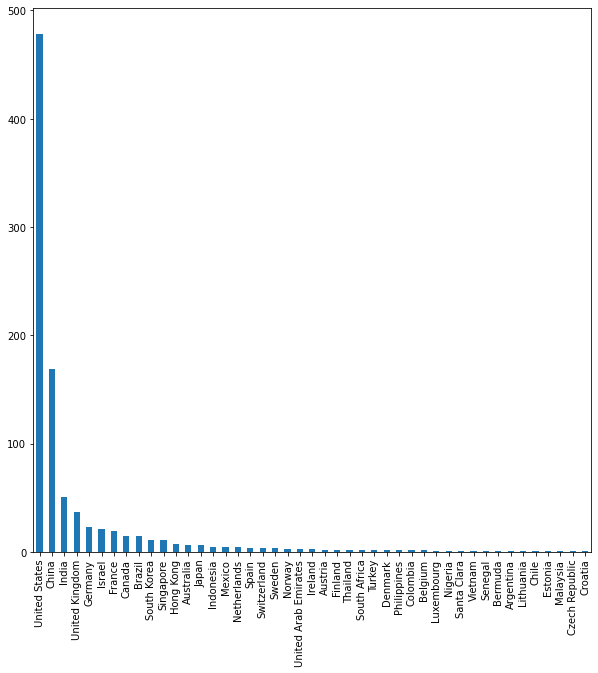

In [4]:
#le nombre d'emtreprise dans un pays donne
print(df['Country'].value_counts())
df['Country'].value_counts().plot.bar(figsize=(10,10))
plt.show()

In [5]:
print(df['Industry'].value_counts())

Fintech                              191
Internet software & services         167
E-commerce & direct-to-consumer      102
Artificial intelligence               73
Health                                63
Other                                 51
Supply chain logistics & delivery     51
Cybersecurity                         41
Mobile & telecommunications           37
Data management & analytics           36
Hardware                              32
Auto & transportation                 29
Edtech                                27
Consumer & retail                     23
Travel                                13
Name: Industry, dtype: int64


In [6]:
#le nombre d'entreprise au US dans certaines villes
US = df[df['Country']=='United States']['City'].value_counts()
print(f"nombre d'entreprise dans X villes aux US: {len(US)} villes")
print(US)

nombre d'entreprise dans X villes aux US: 114 villes
San Francisco          134
New York                81
Chicago                 14
Boston                  14
Mountain View           13
                      ... 
Raleigh                  1
South San Francisco      1
Chatham                  1
Westerville              1
Tampa                    1
Name: City, Length: 114, dtype: int64


In [7]:
#le nombre d'entreprise en Chine dans certaines villes
china = df[df['Country']=='China']['City'].value_counts()
print(f"nombre d'entreprise dans X villes en chine: {len(china)} villes")
print(china)

nombre d'entreprise dans X villes en chine: 22 villes
Beijing      62
Shanghai     45
Shenzhen     18
Hangzhou     14
Chengdu       4
Guangzhou     4
Nanjing       3
Chongqing     2
Changzhou     2
Wuhan         2
Changsha      2
Zhuhai        1
Luohe         1
Hunan         1
Jiangsu       1
Hefei         1
Qingdao       1
Wuxi          1
Tianjin       1
Guiyang       1
Dongguan      1
Suzhou        1
Name: City, dtype: int64


<AxesSubplot:xlabel='Valuation ($B)', ylabel='Industry'>

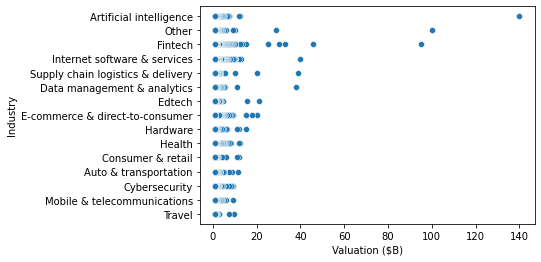

In [8]:
sns.scatterplot(data=df, x="Valuation ($B)", y="Industry")

# Preprocessing

In [9]:
#df = pd.to_numeric(df, downcast='integer')
#print(df)

In [10]:
#conversion de la variable "Valuation ($B)" en int64
df['Valuation ($B)'] = df['Valuation ($B)'].apply(np.int64)
df.head(10)

,Company,Valuation ($B),Country,City,Industry,Investor 1,Investor 2,Investor 3,Investor 4
0,Bytedance,140,China,Beijing,Artificial intelligence,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,100,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,0
2,Stripe,95,United States,San Francisco,Fintech,Khosla Ventures,LowercaseCapital,capitalG,0
3,Klarna,45,Sweden,Stockholm,Fintech,Institutional Venture Partners,Sequoia Capital,General Atlantic,0
4,Canva,40,Australia,Surry Hills,Internet software & services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,0
5,Instacart,39,United States,San Francisco,Supply chain logistics & delivery,Khosla Ventures,Kleiner Perkins Caufield & Byers,Collaborative Fund,0
6,Databricks,38,United States,San Francisco,Data management & analytics,Andreessen Horowitz,New Enterprise Associates,Battery Ventures,0
7,Revolut,33,United Kingdom,London,Fintech,index Ventures,DST Global,Ribbit Capital,0
8,Nubank,30,Brazil,Sao Paulo,Fintech,Sequoia Capital,Redpoint e.ventures,Kaszek Ventures,0
9,Epic Games,28,United States,Cary,Other,Tencent Holdings,KKR,Smash Ventures,0


In [11]:
#encoder the data
X_encoder = OrdinalEncoder()
X = X_encoder.fit_transform(df)
print(X)

[[115.  27.   8. ... 404. 396.   6.]
 [739.  26.  43. ... 148. 367.   0.]
 [754.  25.  43. ... 297. 497.   0.]
 ...
 [405.   0.  43. ...  59. 395.   0.]
 [669.   0.  43. ... 166. 436.   0.]
 [615.   0.   1. ...  55. 424.   0.]]


# Modeling

In [12]:
#standariser les donnees encoder 
#X = X.reshape(-1,1)
modelA = make_pipeline(MinMaxScaler(), KMeans(n_clusters=2))
#print(modelA.fit_predict(X))
prediction = modelA.fit_predict(X)
print(prediction)

[1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0
 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0
 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1
 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0
 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1
 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0
 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0
 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1
 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 0 0 

In [13]:
#ajouter la categorisation au dataframe
#prediction = prediction.astype('int64')
test = {
    "avenir": prediction
}
predire = pd.DataFrame(test)
#liste = [predire, data]
df = pd.concat([predire, data], axis=1)
print(df.shape)
df.head(20)

(936, 12)


,avenir,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Investor 4
0,1,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,0,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,NaN
2,0,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures,LowercaseCapital,capitalG,NaN
3,0,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners,Sequoia Capital,General Atlantic,NaN
4,1,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,NaN
5,0,5,Instacart,39.0,2014-12-30,United States,San Francisco,Supply chain logistics & delivery,Khosla Ventures,Kleiner Perkins Caufield & Byers,Collaborative Fund,NaN
6,0,6,Databricks,38.0,2019-02-05,United States,San Francisco,Data management & analytics,Andreessen Horowitz,New Enterprise Associates,Battery Ventures,NaN
7,0,7,Revolut,33.0,2018-04-26,United Kingdom,London,Fintech,index Ventures,DST Global,Ribbit Capital,NaN
8,1,8,Nubank,30.0,2018-03-01,Brazil,Sao Paulo,Fintech,Sequoia Capital,Redpoint e.ventures,Kaszek Ventures,NaN
9,0,9,Epic Games,28.7,2018-10-26,United States,Cary,Other,Tencent Holdings,KKR,Smash Ventures,NaN
